In [56]:
from scipy.optimize import minimize
import math
import numpy as np
import Product
import MaterialRessources
import math
class Batch(object):

    def __init__(self, product_ID, productCount, produced, finished, priority):
        self.product_ID = product_ID
        self.productCount = productCount
        self.produced = produced
        self.finished = finished
        self.priority = priority

class Scheduling(object):

    def __init__(self, batch_ID, station_ID, employee_ID):
        self.batch_ID = batch_ID
        self.station_ID = station_ID
        self.employee_ID = employee_ID

b1 = Batch(product_ID=1, productCount=100, produced=0, finished='false', priority=10)

def materialPlanning(batch):
    counter = 0
    recipeID = 0
    matList = []
    matAmountList = []
    for rec in Product.recipes:
        if batch.product_ID == rec.product_ID:
            recipeID = rec.recipe_ID
    for mat in MaterialRessources.matRequirements:
        if mat.recipe_ID == recipeID:
            matList.append(mat.material_ID)
            matAmountList.append(mat.requiredQuantities*batch.productCount)
    for mat in matList:             # for Loop for reqMaterial-stock
        counter +=1
        for s in MaterialRessources.materialStorages:
            if mat == s.material_ID:
                matAmountList[counter-1] -= s.stock
    narr = np.array([matList, matAmountList])
    return narr

print("Product ID and Amount:", "\n",materialPlanning(b1))

#https://www.microtech.de/blog/optimale-bestellmenge
def getStorageCosts(matID):
    for ms in MaterialRessources.materialStorages:
        if ms.material_ID == matID:
            storageCosts = ms.costsPerUnit
    return storageCosts

def getMaterialCosts(matID):
    for ms in MaterialRessources.materials:
        if ms.material_ID == matID:
            materialCosts = ms.pricePerUnit
    return materialCosts

Product ID and Amount: 
 [[  1   2]
 [170  90]]


In [63]:
def optimizedOrderAmount(x, storage_costs, order_costs, order_amount):
    return storage_costs(x) + (order_costs(x) * order_amount/x)

def createOrderCostsFunction(order_base_price, price_per_unit, max_rebate, rebate_const = 1.0):
    def orderCosts(x):
        return order_base_price + (price_per_unit * (1 - max_rebate * (1 - math.exp(- rebate_const * x)))) * x

    return orderCosts

def calloptOrderAmount(narr, storage_costs, order_costs, order_amount):
    i = 0
    while i < narr.size/2:
        opt = minimize(optimizedOrderAmount, 20, args=(narr[0][i],narr[1][i], storage_costs, order_costs, order_amount), bounds=[(0, 1000)])
        x = math.ceil(opt.x)
        frequency = narr[1][i]/x
        #frequency = math.ceil(frequency)
        #res = orderCosts/fun*getStorageCosts(narr[0][i])
        print("Optimized Order Amount for Material with ID", narr[0][i], "is:", x,"with the order frequency:", frequency)
        i += 1

def optimizedOrder(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return 100*x1+40*x2+60*x3
x0 = [170,90, 120]
opt = minimize(optimizedOrder, x0)
print(opt)

      fun: -19627982279.453514
 hess_inv: array([[266361.19793159, 106543.70707961, 159816.0257357 ],
       [106543.70707961,  42618.33399464,  63926.18703847],
       [159816.0257357 ,  63926.18703847,  95890.55962747]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 2
     njev: 16
   status: 0
  success: True
        x: array([-1.29131578e+08, -5.16523262e+07, -7.74788579e+07])


In [64]:
import matplotlib.pyplot as plt


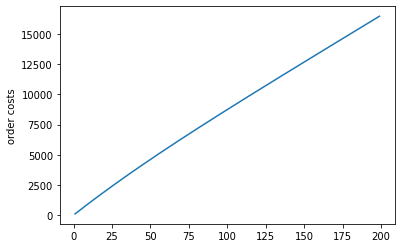

In [65]:
orderCostFunc = createOrderCostsFunction(10, 100, 0.2, 0.01)
x_values = range(1, 200)
plt.plot(x_values, [orderCostFunc(x) for x in x_values])
plt.ylabel('order costs')
plt.show()

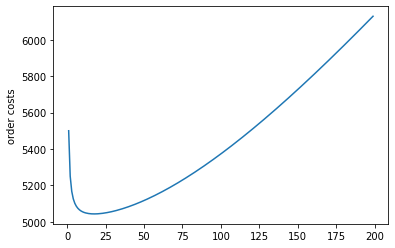

In [73]:
def storageCosts(x):
    return 10*x

plt.plot(x_values, [optimizedOrderAmount(x, storageCosts, orderCostFunc, 50) for x in x_values])
plt.ylabel('order costs')
plt.show()

In [72]:
order_amount = 50
minimize(optimizedOrderAmount, 20, args=(storageCosts, createOrderCostsFunction(10, 100, 0.2, 0.01), order_amount), bounds=[(0, 1000)])

      fun: 5043.027074040178
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([17.60115354])